In [1]:
import cv2
from diffraction_subfunctions import diffraction_to_azimuthal_avg
from diffraction_subfunctions import sms_to_mrdf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
### Plotting - Settings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [3]:
xcen = 391.55 #center of the diffraction
ycen = 393.03 #center of the diffraction

folder = r'\\win.desy.de\home\kayanatm\My Documents\GitHub\Electron-diffraction\Gas and Liquid_diffraction_files'
files = []

for root, dirs, _files in os.walk(folder):
    files.extend(_files)
files

['Gas_diffint_1D.txt',
 'Iatom_gly_liq.png',
 'Iatom_gly_simulated_kirk_gas.png',
 'Iatom_gly_simulated_kirk_gas_1D.txt',
 'Imol_gly_liq.png',
 'Imol_gly_simulated_kirk_gas.png',
 'Imol_gly_simulated_kirk_gas_1D.txt',
 'Itot_gly_liq.png',
 'Itot_gly_simulated_kirk_gas.png',
 'Liq_diffint_1D.txt']

In [4]:
import pandas as pd
df_gas = pd.read_csv(os.path.join(folder, files[0]), sep='\s+')

s_gas = df_gas['s'].to_numpy()
Iatom_gas = df_gas['Iatom'].to_numpy()
Imol_gas = df_gas['Imol'].to_numpy()

df_gas

,s,Iatom,Imol
0,0.020142,254.957210,254.695900
1,0.060427,254.802110,253.595540
2,0.100712,254.492870,251.411740
3,0.140997,254.030430,248.170260
4,0.181282,253.416050,243.908450
...,...,...,...
195,7.875704,5.196025,-0.043425
196,7.915989,5.103710,-0.041502
197,7.956274,5.013761,-0.039221
198,7.996559,4.926911,-0.036619


In [5]:
df_liq = pd.read_csv(os.path.join(folder, files[-1]), sep='\s+')

s_liq = df_liq['s'].to_numpy()
Iatom_liq = df_liq['Iatom'].to_numpy()
Imol_liq = df_liq['Imol'].to_numpy()

df_liq

,s,Iatom,Imol
0,0.020142,254.957210,228.537570
1,0.060427,254.802100,153.559600
2,0.100712,254.492870,67.239610
3,0.140997,254.030430,18.400494
4,0.181282,253.416030,3.941112
...,...,...,...
195,7.875704,5.195892,-0.000060
196,7.915989,5.103579,-0.000053
197,7.956274,5.013632,-0.000054
198,7.996559,4.926784,-0.000064


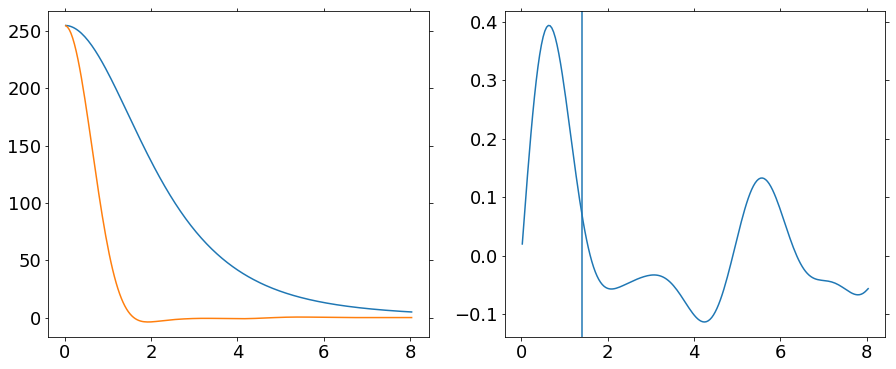

In [6]:
sMs_gas = np.multiply(s_gas, np.divide(Imol_gas, Iatom_gas))

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(s_gas, Iatom_gas)
plt.plot(s_gas, Imol_gas)
plt.subplot(1,2,2)
plt.plot(s_gas, sMs_gas)
plt.axvline(1.4)

(-0.5, 1.0)

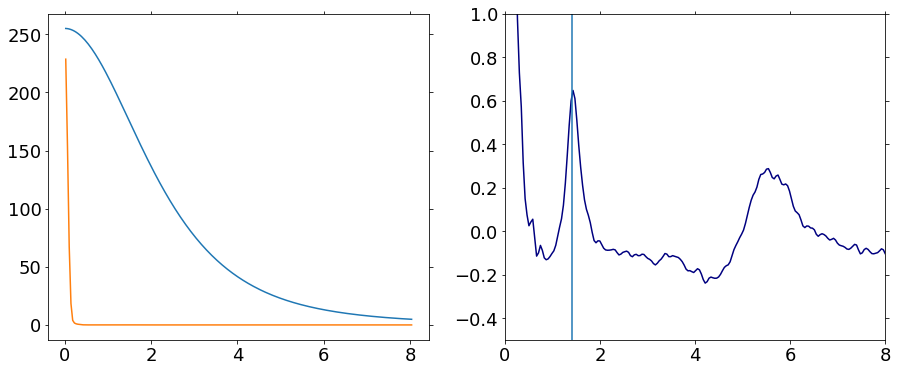

In [7]:
sMs_liq = np.multiply(s_liq, np.divide(Imol_liq, Iatom_liq))*1000
#sMs_liq = sMs_liq / np.linalg.norm(sMs_liq)
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(s_liq, Iatom_liq)
plt.plot(s_liq, Imol_liq)
plt.subplot(1,2,2)
plt.plot(s_liq, sMs_liq, color = 'navy')
plt.axvline(1.4)
plt.xlim([0,8])
plt.ylim([-0.5,1])

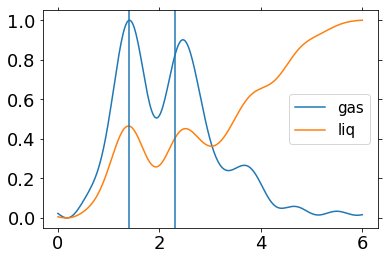

In [8]:
r_liq, mrdf_liq = sms_to_mrdf(s_liq, sMs_liq)
r_gas, mrdf_gas = sms_to_mrdf(s_gas, sMs_gas)
from diffraction_subfunctions import normalize

mrdf_liq = normalize(mrdf_liq) #mrdf_liq / np.linalg.norm(mrdf_liq)

mrdf_gas = normalize(mrdf_gas) #mrdf_gas / np.linalg.norm(mrdf_gas)

plt.plot(r_gas, mrdf_gas, label = 'gas')
plt.plot(r_liq, mrdf_liq, label = 'liq')
plt.axvline(1.4)
plt.axvline(2.3)
plt.legend(fontsize  = 'small')

In [9]:
mrdf_liq.shape

(300,)

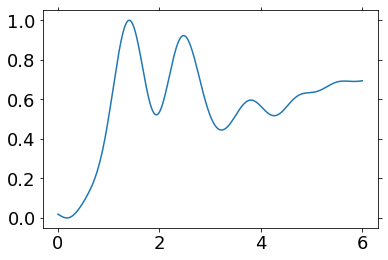

In [11]:
mix = normalize(mrdf_gas+mrdf_liq)

plt.plot(r_gas, mix)